# RELISON: A framework for REcommending LInks in SOcial Networks

RELISON is a framework for experimentation on the link recommendation task in social networks, which aims to identify those people in the network with whom a user might be interested to connect, interact or befriend. RELISON provides tools for executing and evaluating contact recommendation approaches, considering not only their accuracy, but also aspects like their novelty, diversity and the effects that such recommendations have on global properties of the networks (as changes in the structural properties or in the characteristics of the information arriving to the users). In order to measure these effects, RELISON also provides functionality for a) analyzing the structural properties of social networks, b) detecting clusters of users (communities) and c) simulating the diffusion of information in a social network. These functionalities can be used regardless of whether recommendations have been provided to the users.

This notebook provides a simple tutorial on how to use the standard functionalities and command line programs of the RELISON framework. After the tutorial is finished, you shall learn how to:

1. Generate random networks with different properties.
2. Execute link recommendations over that network.
3. Analyze the properties of a network or graph.
4. Find communities of tightly connected users.


In [ ]:
# Run on Google Colab
!wget https://download.java.net/java/GA/jdk14.0.2/205943a0976c4ed48cb16f1043c5c647/12/GPL/openjdk-14.0.2_linux-x64_bin.tar.gz
!tar xvf openjdk-14.0.2_linux-x64_bin.tar.gz
!mv jdk-14.0.2 /usr/lib/jvm
!update-alternatives --install "/usr/bin/javac" "javac" "/usr/lib/jvm/jdk-14.0.2/bin/javac" 3
!update-alternatives --install "/usr/bin/java" "java" "/usr/lib/jvm/jdk-14.0.2/bin/java" 3
!update-alternatives --set "javac" "/usr/lib/jvm/jdk-14.0.2/bin/javac"
!update-alternatives --set "java" "/usr/lib/jvm/jdk-14.0.2/bin/java"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/jdk-14.0.2"
!java -version

## Installation

As a first step, we need to install and configure the RELISON framework so we can work with it. In this case, we download it from the Git repository, we install the different Maven packages, and we build the definitive executable JAR, so we can execute the different command line programs provided by the framework.


**Note:** If you have reached here from the provided Docker container in the repository, this step is unnecessary.

In [1]:
!mkdir RELISON
!curl -L https://github.com/ir-uam/RELISON/releases/download/v1.0.0-maven/relison.jar --output RELISON/relison.jar

Ya existe el subdirectorio o el archivo RELISON.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  138M    0  1371    0     0   1820      0 22:09:55 --:--:-- 22:09:55  1820
  1  138M    1 1604k    0     0   925k      0  0:02:33  0:00:01  0:02:32 1634k
  2  138M    2 3141k    0     0  1147k      0  0:02:03  0:00:02  0:02:01 1582k
  3  138M    3 4758k    0     0  1274k      0  0:01:51  0:00:03  0:01:48 1595k
  4  138M    4 6375k    0     0  1347k      0  0:01:45  0:00:04  0:01:41 1601k
  5  138M    5 8001k    0     0  1394k      0  0:01:41  0:00:05  0:01:36 1605k
  6  138M    6 9601k    0     0  1425k      0  0:01:39  0:00:06  0:01:33 1599k
  7  138M    7 10.9M    0     0  1447k      0  0:01:37  0:00:07  0:01:30 1612k
 

In [2]:
%cd RELISON
!mkdir data
%cd ..

C:\Users\Javier\Documents\RELISON
C:\Users\Javier\Documents


Ya existe el subdirectorio o el archivo data.


Once we have installed our repository, we can configure the variables we are going to need to execute the tutorial. need to define the following variables:
- **JAR file:** The actual location of the JAR file. If it has been downloaded through the previous commands, it should be on `./RELISON/RELISON.jar`. If you are using the Docker image, it is on `/tmp/RELISON/RELISON.jar`.
- **Training graph:** The example training graph
- **Test graph:** The example test graph.

In [3]:
jar_file = './RELISON/relison.jar'
train_graph = './RELISON/data/train.txt'
test_graph = './RELISON/data/test.txt'
graph = './RELISON/data/graph.txt'

In [4]:
!pip3 install pandas
!pip3 install matplotlib

We show first how the graph files are defined. Each row of the file contains a different edge. An edge has the following information:
- Origin node
- Destination node
- Weight of the node
- Type of the node (optional, not in this example)
These fields are tab separated. We load, as an example, the training graph using Pandas.

In [5]:
import pandas as pd
import sys, os

## Step 1: Automatic graph generation
As a first step, we are crafting an automatic network, using the graph generation capabilities of the RELISON library. The RELISON library provides a program, `graphgen`, for automatic generation of networks.

In [6]:
!java -jar $jar_file graphgen

graphgen


ERROR: Invalid arguments
	Output: file where we want to store the network.
	Directed: true if the network is directed, false otherwise.
	Algorithm: the name of the graph generation algorithm.
		empty : the empty graph.
		complete : the complete graph.
		random : an Erdos-Renyi graph.
		preferential-attachment : the Barabasi-Albert graph.
		watts-strogatz : the Watts-Strogatz graph.


The program receives the following arguments:
- **output:** the file where we want to store the network
- **directed:** `true` if the network is directed, `false` otherwise
- **num_nodes:** the number of nodes in the network
- **algorithm:** the identifier of the algorithm
- **parameters:** the list of parameters of the algorithm.

In this example, we are generating a simple graph with 100 nodes using the random Erdos-Renyi graph. This graph receives, as parameter, the number of nodes and the probability of connection between them:

In [7]:
!java -jar $jar_file graphgen RELISON/data/graph.txt false 100 random

graphgen
Configuring graph generator


ERROR: Invalid arguments for the Erdös-Renyi graph
Missing: 
	 prob: link creation probability


As we need a probability of link creation, we establish it in 0.1

In [8]:
!java -jar $jar_file graphgen RELISON/data/graph.txt false 100 random 0.1

graphgen
Configuring graph generator
Finished configuring graph generator (3 ms.)
Generating graph...
Finished generating graph + (38 ms.
Writing the graph...
Finished writing the graph (69 ms.)


If we read it, we observe the following file:

In [9]:
graph_file = pd.read_csv("RELISON/data/graph.txt", sep="\t", names=["Origin", "Destination", "Weight"])
graph_file

,Origin,Destination,Weight
0,0,4,1.0
1,0,7,1.0
2,0,23,1.0
3,0,50,1.0
4,0,53,1.0
...,...,...,...
490,91,95,1.0
491,93,96,1.0
492,93,97,1.0
493,95,99,1.0


Before to continue, for experimental reasons, we split the graph into two networks: one for training and one for testing

In [10]:
train = graph_file.sample(frac=0.8)
test = graph_file.drop(train.index)

In [11]:
train

,Origin,Destination,Weight
229,28,41,1.0
365,52,58,1.0
351,49,63,1.0
466,77,94,1.0
435,65,85,1.0
...,...,...,...
102,11,96,1.0
441,67,71,1.0
314,42,57,1.0
256,32,50,1.0


In [12]:
test

,Origin,Destination,Weight
1,0,7,1.0
3,0,50,1.0
12,1,21,1.0
13,1,24,1.0
19,1,88,1.0
...,...,...,...
470,79,92,1.0
482,86,90,1.0
485,88,93,1.0
486,88,97,1.0


In [13]:
train.to_csv(train_graph, sep="\t", index=False)
test.to_csv(test_graph, sep="\t", index=False)

## Step 2: Recommending links in a network
Once we have the network, we can apply over it different link recommendation algorithms. In order to do this, we apply the `recommendation` program provided by the RELISON algorithm. If we execute it without further information, we might observe the required and optional arguments of the program and a description of them

In [14]:
!java -jar $jar_file recommendation

recommendation

Invalid arguments.
Usage:
	Train: Route to the file containing the training graph.
	Test: Route to the file containing the test links.
	Multigraph: true if the network allows multiple edges, false otherwise.
	Directed: true if the network is directed, false otherwise.
	Weighted: true if the network is weighted, false otherwise.
	Selfloops: true if the network allows self-loops, false otherwise.
	ReadTypes: true if we have to read the edge types from the file, false otherwise.
	Algorithms: Route to a YAML file containing the recommender configurations.
	Output directory: Directory in which to store the recommendations and the output file.
	Rec. Length: Maximum number of recommendations per user.

	Optional arguments:
		-users test/all: selects the subset of users for whom we generate recommendation (all of them, or just those in test.
		-print value: true if, additionally to the results, you want to print the recommendations, false otherwise (by default, true)
		-reciprocal value: true 

In this program, we need to provided the training and test networks we generated earlier, and information about them (whether they are multigraphs, directed, weighted, we allow them to have self-loops or if they have types we might want to read). Appart from that, we need to provide a YAML file containing the information about the algorithms and evaluation metrics to compute and a directory where to store the recommendations. If we need to use feature data, we can provide that using the optional parameters.

In [15]:
!curl -L https://raw.githubusercontent.com/ir-uam/RELISON/master/Example%20configuration%20files/algorithms-example.yml --output rec.yml
!mkdir rec-res

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   656  100   656    0     0   3416      0 --:--:-- --:--:-- --:--:--  3434
Ya existe el subdirectorio o el archivo rec-res.


As example algorithms, in this example, we are using the provided YAML file in the repository, which explores four algorithms:
- Implicit Matrix Factorization
- BM25
- Popularity
- Random

and we evaluate them using nDCG@10 and MAP@10

We print below the YAML file for executing these algorithms and metrics

```yaml
algorithms:
  iMF:
    k:
      type: int
      values: 300
    lambda:
      type: double
      values: 150.0
    alpha:
      type: double
      values: 40.0
    weighted:
      type: boolean
      values: false
  BM25:
    uSel:
      type: orientation
      values: OUT
    vSel:
      type: orientation
      values: IN
    dlSel:
      type: orientation
      values: OUT
    k:
      type: double
      values: 0.1
    b:
      type: double
      values: 0.1
    weighted:
      type: boolean
      values: true
  Popularity:
  Random:
metrics:
  nDCG:
    cutoff:
      type: int
      values: 10
  MAP:
    cutoff:
      type: int
      values: 10
```

So, in the following commands, we define the outgoing folder, and we execute our program. We are working with a simple, directed and weighted graph. We shall avoid self-loops, so:

In [16]:
output_dir = "./rec-res/"
multigraph = "false"
directed = "false"
weighted = "false"
self_loops = "false"
read_types = "false"
rec_yaml = "rec.yml"
cutoff = 10

In [17]:
!java -jar $jar_file recommendation $train_graph $test_graph $multigraph $directed $weighted $self_loops $read_types $rec_yaml $output_dir $cutoff

recommendation
-------- Started unweighted variants --------
Data read (12 ms.)
Algorithms selected (153 ms.)
Num. target users: 102


Algorithm 1/4: Popularity finished (63 ms.)
Algorithm 2/4: Random finished (68 ms.)
Algorithm 3/4: BM25_wei_OUT_IN_OUT_0.1_0.1 finished (69 ms.)
dic. 12, 2022 1:28:52 A. M. es.uam.eps.ir.ranksys.mf.als.ALSFactorizer factorize
INFO: iteration n =   1 t = 1,07s
dic. 12, 2022 1:28:53 A. M. es.uam.eps.ir.ranksys.mf.als.ALSFactorizer factorize
INFO: iteration n =   2 t = 0,83s
dic. 12, 2022 1:28:54 A. M. es.uam.eps.ir.ranksys.mf.als.ALSFactorizer factorize
INFO: iteration n =   3 t = 0,76s
dic. 12, 2022 1:28:54 A. M. es.uam.eps.ir.ranksys.mf.als.ALSFactorizer factorize
INFO: iteration n =   4 t = 0,75s
dic. 12, 2022 1:28:55 A. M. es.uam.eps.ir.ranksys.mf.als.ALSFactorizer factorize
INFO: iteration n =   5 t = 0,66s
dic. 12, 2022 1:28:56 A. M. es.uam.eps.ir.ranksys.mf.als.ALSFactorizer factorize
INFO: iteration n =   6 t = 0,72s
dic. 12, 2022 1:28:57 A. M. es.uam.eps.ir.ranksys.mf.als.ALSFactorizer factorize
INFO: iteration n =   7 t = 0,73s
dic. 12, 2022 1:28:57 A. M. es.uam.eps.ir.ranksys.

Then, we read the output of the files. First, we observe the output of a recommendation algorithm. As we can observe, the output is just a csv file containing (target user, candidate user, score) triplets.

In [18]:
rec_file = os.path.join(output_dir, "recs/BM25_wei_OUT_IN_OUT_0.1_0.1.txt")
rec = pd.read_csv(rec_file, sep="\t", names=["Target user", "Candidate user", "Score"])
rec

,Target user,Candidate user,Score
0,66,13,4.729913
1,66,10,4.696932
2,66,35,4.680614
3,66,55,4.669798
4,66,42,4.611668
...,...,...,...
995,2,55,4.111208
996,2,50,3.085202
997,2,70,3.081604
998,2,43,3.074433


And, finally, we read the metrics: metric file shows the name of the algorithm, a fraction (basically, this field can be ignored as it only provides information on how low/high the algorithm appears on the list), and the different metrics. Note that, in this case, metric values are very low, due to the network used being a random network.

In [19]:
metrics = pd.read_csv(os.path.join(output_dir, "evaluation.txt"), sep="\t", index_col=0)
metrics

,Fraction,nDCG@10,MAP@10
Variant,,,
BM25_wei_OUT_IN_OUT_0.1_0.1,0.25,0.042926,0.021687
Popularity,0.50,0.061554,0.034314
Random,0.75,0.035550,0.012655
iMF_unw_300_150.0_40.0,1.00,0.063604,0.035703


## Step 2: Analyzing the structural properties of a network

We might be interested on studying the structural properties of networks. In order to get such properties, we use the `sna` program provided by the library. If we execute it without further information, we might observe the required and optional arguments of the program and a description.

In [20]:
!java -jar $jar_file sna

sna


ERROR: Invalid arguments.
Usage:
	Graph file: a file containing the graph to analyze.
	Multigraph: true if the network allows multiple edges, false otherwise.
	Directed: true if the network is directed, false otherwise.
	Weighted: true if the network is weighted, false otherwise.
	Selfloops: true if the network allows self-loops, false otherwise.
	Metrics: a YAML file containing the metrics to compute.
	Output: the directory in which to store the metrics.

	Optional parameters:
		-communities commFile1,...,commFileN: a comma separated list of files containing communities.
		--distances: include if we want to precompute distance metrics (recommended if any is used)
		--nodetype: by default, it assumes that nodes are long, but this might change. Formats:
			long: the default value. Nodes are Long values.
			int: nodes are formatted as Integer values.
			string: nodes are formatted as Strings (without separators)


As we can observe, we need to provide information about the network to analyze, as well as a YAML file containing the metrics to compute and a dictionary to store the metrics. If we need to use communities, we can also provide files (we'll explore that later). Also, if we compute distance-based metrics, we can pre-compute them.

In the case of just analyzing the properties of a network, using the `--distances` flag is recommended. Otherwise, it might be necessary to compute distances for each of the metrics.

As example metrics, in this example, we are using the provided YAML file in the repository, which explores three metrics:
- Clustering coefficient
- Eccentricity
- Embeddedness

We print below the YAML file for executing these three metrics.

```yaml
metrics:
  Clustering coefficient:
    type: graph
    params:
      uSel:
        type: orientation
        values: IN
      vSel:
        type: orientation
        values: OUT
  Eccentricity:
    type: vertex
  Embeddedness:
    type: edge
    params:
      uSel:
        type: orientation
        values: OUT
      vSel:
        type: orientation
        values: IN 
```

So, in the following commands, we define the outgoing folder, and we execute our program. We are working with a simple, directed and weighted graph. We shall avoid self-loops, so:

In [21]:
!curl -L https://raw.githubusercontent.com/ir-uam/RELISON/master/Example%20configuration%20files/metrics-example.yml --output metrics.yml
!mkdir metrics-res

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   369  100   369    0     0   2157      0 --:--:-- --:--:-- --:--:--  2157
Ya existe el subdirectorio o el archivo metrics-res.


In [22]:
output_dir = "./metrics-res/"

In [28]:
multigraph = "false"
directed = "false"
weighted = "false"
self_loops = "false"
read_types = "false"
metrics_yaml = "metrics.yml"
jar_file = './RELISON/RELISON.jar'
train_graph = './RELISON/data/train.txt'
test_graph = './RELISON/data/test.txt'
graph = './RELISON/data/graph.txt'

In [29]:
!java -jar ./RELISON/RELISON.jar sna ./RELISON/data/graph.txt $multigraph $directed $weighted $self_loops $metrics_yaml $output_dir --distances

sna
Network read (60 ms.)
Communities read (19 ms.
Grid read (86 ms.)
Starting vertex metrics...
Identified 1 metrics
Running Eccentricity
Computed Eccentricity (5 ms.)
Computed average Eccentricity (13 ms.
Metric Eccentricity done (25 ms.)
Vertex metrics done (33 ms.)
Starting edge metrics...
Identified 1 metrics
Running Embeddedness_OUT_IN
Computed Embeddedness_OUT_IN (21 ms.)
Computed average Embeddedness_OUT_IN (23 ms.
Metric Embeddedness_OUT_IN done (42 ms.)
Edge metrics done (47 ms.)
Starting pair metrics...
Identified 0 metrics
Pair metrics done (2 ms.)
Starting individual community metrics...
Identified 0 metrics
Individual community metrics done (2 ms.)
Starting global community metrics...
Identified 0 metrics
Global community metrics done (3 ms.)
Starting graph metrics...
Identified 1 metrics
Running Clustering coefficient_IN_OUT
Metric Clustering coefficient_IN_OUT done (9 ms.)
Graph metrics done (13 ms.)


Once the program has been executed, we can obtain the results from the output folder. In the example, we have studied vertex, edge and graph metrics, so we shall go throughout them.

### Graph metrics
Graph metrics are global to the whole graph. That means that a single numeric value is enough to represent it. The values of graph metrics are stored in the `global.txt` file in the output directory. Each line shows the name and value of the corresponding metric. In the case of individual vertex and edge metrics, this file contains the average value:

In [30]:
pd.read_csv(os.path.join(output_dir, "global.txt"), delimiter='\t', index_col=0)

,value
metric,
Average Embeddedness_OUT_IN,0.056929
Average Eccentricity,3.180000
Clustering coefficient_IN_OUT,0.107560


### Vertex metrics
Vertex metrics are properties related to a single node in the graph. As its distribution might be interesting, we store the individual values in the `vertex` directory of the output folder. For each metric, we store a different file. In this case, we only have the `Eccentricity` metric. Below, we show the nodes with a greater eccentricity (maximum finite distance from the node to the rest of them in the network)

In [31]:
eccentricity = pd.read_csv(os.path.join(os.path.join(output_dir, "vertex"), "Eccentricity.txt"), delimiter='\t', index_col=0)
eccentricity.sort_values(by="metric", ascending=False).head(10)

,metric
node,
54,4.0
80,4.0
66,4.0
23,4.0
17,4.0
74,4.0
87,4.0
14,4.0
81,4.0


Considering that we have the individual data, it is simple for us to plot the distribution of the metric over the different nodes, in different formats.

#### Example 1: Density-like distribution
In this plot, the x axis shows the eccentricity values, and the y axis the number of nodes containing that value.

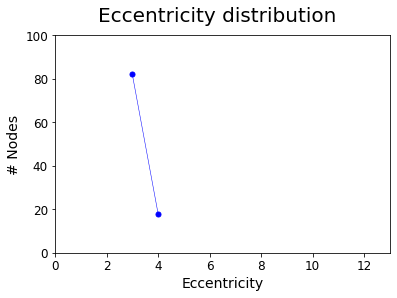

In [32]:
import matplotlib
import matplotlib.pyplot as plt


series = eccentricity['metric'].value_counts().sort_index()

x_values = [x for x in series.keys()]
x_values

y_values = [y for y in series]
y_values

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
plt.suptitle('Eccentricity distribution', fontsize=20)
plt.plot(x_values, y_values, 'b', marker="o", markersize=5, linewidth=0.5)
plt.axis([0, 13, 0, 100])
plt.xlabel('Eccentricity', fontsize=14)
plt.ylabel('# Nodes', fontsize=14)
plt.show()

#### Example 2: Cumulative like distribution
Here, we plot in the x axis the number of the node, and, in the y axis, the eccentricity value. For this, we sort the values from greater to smaller.

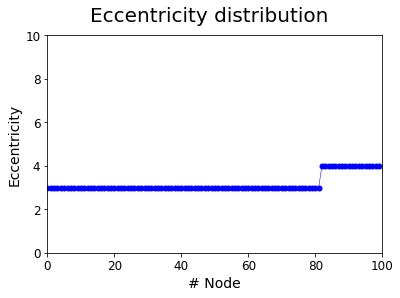

In [33]:
import matplotlib
import matplotlib.pyplot as plt

x_values = []
y_values = []

i = 0
for index, row in eccentricity.sort_values(by="metric", ascending=True).iterrows():
    x_values.append(i)
    i += 1
    y_values.append(row["metric"])

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
plt.suptitle('Eccentricity distribution', fontsize=20)
plt.plot(x_values, y_values, 'b', marker="o", markersize=5, linewidth=0.5)
plt.axis([0, 100, 0, 10])
plt.xlabel('# Node', fontsize=14)
plt.ylabel('Eccentricity', fontsize=14)
plt.show()

## Step 3: Community detection

In addition to analyzing the structure of the network using raw numbers, we can use community detection algorithms to explore the clustering of nodes in the network. In this case, we can use the `communities` program available in the framework:

In [34]:
!java -jar $jar_file communities

communities


ERROR: Invalid arguments
Usage:
	Graph: the file containing the network graph.
	Multigraph: true if the network is a multigraph, false otherwise.
	Directed: true if the network is directed, false otherwise.
	Weighted: true if the network uses weights, false otherwise.
	Self-loops: true if the network has self-loops, false otherwise.
	Algorithms: a YAML file containing the algorithm configurations.
	Output: the directory in which we want to store the communities.


The program receives the following arguments:
- **graph:** the file where the network is stored
- **multigraph:** `true` if the network is a multigraph, `false` otherwise
- **directed:** `true` if the network is directed, `false` otherwise
- **weighted:** `true` if the network is weighted, `false` otherwise
- **self-loops:** `true`if we want to read self-loops, `false` otherwise
- **algorithm:** the YAML file with the configuration.
- **output:** the directory in which to store the communities.


In [35]:
!curl -L https://raw.githubusercontent.com/ir-uam/RELISON/master/Example%20configuration%20files/comm-detection-example.yml --output communities.yml
!mkdir comms-res

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    73  100    73    0     0    214      0 --:--:-- --:--:-- --:--:--   214
Ya existe el subdirectorio o el archivo comms-res.


In this example, we are going to use the defaultWe print below the YAML file for executing these three metrics.

```yaml
algorithms:
  Louvain:
    threshold:
      type: double
      value: 0.5
```


In [36]:
comms_yaml = "communities.yml"
output_dir = "comms-res/"
!java -Xss10m -jar $jar_file communities $graph $multigraph $directed $weighted $self_loops $comms_yaml $output_dir

communities
Starting community detection
Algorithm Louvain started.
Algorithm Louvain finished (106 ms.)
Ending commmunity detection (123 ms.)


We now read the communities detected and we plot their distribution

In [37]:
comms_df = pd.read_csv(os.path.join(output_dir, "Louvain_0.5.txt"), sep="\t", names=["Node", "Communities"])
comms_df

,Node,Communities
0,71,0
1,12,0
2,66,0
3,87,0
4,70,0
...,...,...
95,48,3
96,61,3
97,91,3
98,28,3


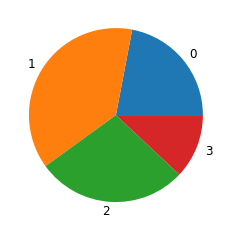

In [38]:
y = comms_df.groupby(by="Communities").count()
plt.pie(y["Node"].values, labels=y.index.values)
plt.show()